In [2]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/20192.ai4eng/master/init.py
import init; init.init(force_download=False); init.get_weblink()
init.endpoint

In [226]:
from local.lib.rlxmoocapi import submit, session
student = session.Session(init.endpoint).login( course_id=init.course_id, 
                                                session_id="UDEA", 
                                                lab_id="lab_02.02" )
init.get_weblink()

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from local.lib import mlutils
from IPython.display import Image
%matplotlib inline

# A machine learning task

We have two species of bugs (**X bugs** and **Z bugs**), for each bug we have measured its **width** and **length**. Once we have a bug, determining if is of  **species X** or **species Z** is very costly (lab analysis, etc.)

**Machine learning goal**: We want to create a model so that, when given the width and length of a bug, will tell us whether it belongs to  **species X** or **species Z**. If the model performs well, we might use it insted of the lab analysis.

**To train a machine learning model** we are build a **training dataset** where we have **annotated** 20 bugs with their **confirmed** species. The training dataset has:

- 20 data items
- two data columns (**width** and **length**)
- one label column, with two unique values: **0 for species X**, and **1 for species Z**.

Observe that:

- For simulation purposes we create a dataset by random sampling.
- The dataset is stored in a file named `train_data.csv` in the notebooks running environment.
- If the notebook environment is destroyed, a new **different** dataset will be created.
- In **Google Colab** you can find this file under the local resources as shown. Download the `train_data.csv` file by right clicking on it

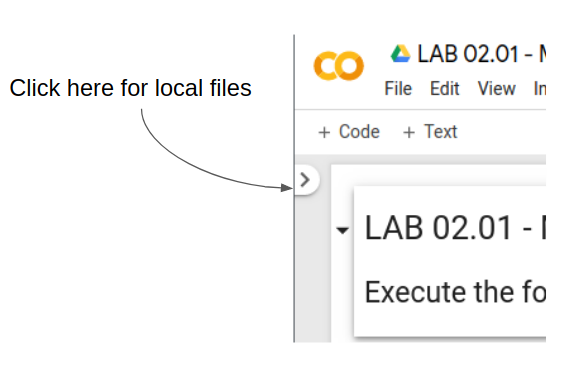

In [8]:
Image("local/imgs/colab_files.png", width=300)

In [9]:
def create_dataset(fname, n=20):
    import os
    from sklearn.preprocessing import MinMaxScaler
    if os.path.exists(fname):
        print ("retrieving data from existing '%s'"%fname)
        d = pd.read_csv(fname)
        X = d.values[:,:2]
        y = d.values[:,2]
    else:
        print ("creating new dataset and storing it into '%s'"%fname)
        X, y = make_moons(n, noise=.2)
        X = np.round(MinMaxScaler().fit_transform(X),2)
        d = pd.DataFrame(np.hstack((X,y.reshape(-1,1))), columns=["width", "length", "label"])
        d.label = d.label.values.astype(int)
        d.to_csv(fname, index=False)

    print ("\ndataset size", d.shape)
    return d, X, y

def load_dataset(fname):
    if os.path.exists(fname):
        print ("retrieving data from existing '%s'"%fname)
        d = pd.read_csv(fname)
        X = d.values[:,:2]
        y = d.values[:,2]    
        return d,X,y
    print ("file %s does not exist, create dataset at the beginning of this notebook")

In [10]:
# KEEPOUTPUT
d, X, y = create_dataset('train_data.csv', n=20)
d.head()

retrieving data from existing 'train_data.csv'

dataset size (20, 3)


,width,length,label
0,0.74,0.49,0
1,0.46,0.98,0
2,0.71,0.76,0
3,0.39,0.58,1
4,0.01,0.58,0


Since it is just two columns, we can visualize it

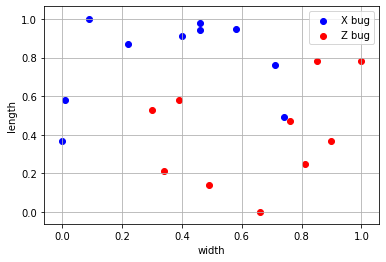

In [11]:
# KEEPOUTPUT
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="blue", label="X bug")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="red", label="Z bug")
plt.xlabel("width");plt.ylabel("length"); plt.legend(); plt.grid();

# Task 1. Create a model for this dataset in Orange

In [Orange](https://orange.biolab.si/) you can visually create machine learning workflows. 

To work with orange you have two options:

- [Download](https://orange.biolab.si/download/#linux) and install it locally.
- email me at [`raul.ramos@udea.edu.co`](mailto:raul.ramos@udea.edu.co) for a pre-configured virtual machine that you can **import** in [VirtualBox](https://www.virtualbox.org/) (which you will have to install previously)


### 1. Create workflow

Open Orange, create a workflow such as the one in the image below:

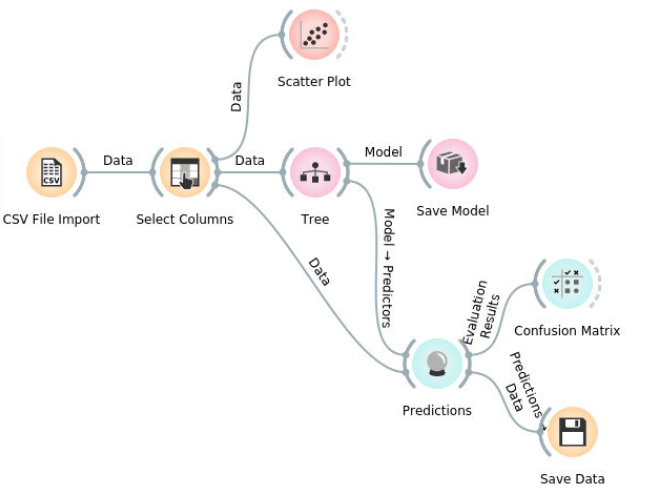

In [6]:
Image("local/imgs/orangeml_create_simple_model.png", width=600)

Where:
    
- in **CSV File Import** select the file `train_data.csv` and define columns `width` and `length` as **Numeric**, and column `label` as **Categorical**
- in **Select Columns** make sure columns `width` and `length` appear as **Features** and column `label` as **Target Variable**, since this is the variable we want to predict
- In **Tree**, the **maximal tree depth** is set to 4
- in **Save Data**:
    - under _Save as_ choose to save prediction results with file name `train_data_scores.csv` as **CSV** (comma separated values)
    - make sure the **add type annotations to header** checkbox is **NOT** clicked.
    - you may want to click the **autosave when receiving new data** checkbox to automatically overwrite predictions results.

- in **Save Model** choose a name so that the trained model can be persisted into a file.

### 2. Visualize your data

- Double click on **Scatter Plot** and make sure you understand what you see.

### 3. Visualize model predictions.

- Double click on **Predictions** and make sure you understand what you see. In particular:
    - How for each data point the tree model assigns a probability for class 0 and a probability for class 1 and then chooses the higher one.
    - The different performance metrics computed.
    
- Double click on **Confusion Matrix** and make sure you understand what you see.

### 4. Submit your work

- Upload the file `train_data_scores.csv` to this notebook's running environment (**Google Colab**)
- Fill the the variables below with the metrics observed in the **Predictions** workflow element. Use at least **two decimal places**.

In [16]:
t1_accuracy  = ...
t1_precision = ...
t1_recall    = ...

In [12]:
t1_train_scores = pd.read_csv("train_data_scores.csv")
print (t1_train_scores.shape)
t1_train_scores.head()

**submit your answer**

In [65]:
student.submit_task(globals(), task_id="task_01");

# Task 2. Use the model to predict on new data

We will create a dataset with a very dense set of points to understand the classification frontier generated by your model

In [196]:
# KEEPOUTPUT
d, X_test, y_test = create_dataset('test_data.csv', n=200)
d.head()

creating new dataset and storing it into 'test_data.csv'

dataset size (200, 3)


,width,length,label
0,0.57,0.92,0
1,0.70,0.72,0
2,0.69,0.07,1
3,0.81,0.15,1
4,0.44,0.82,0


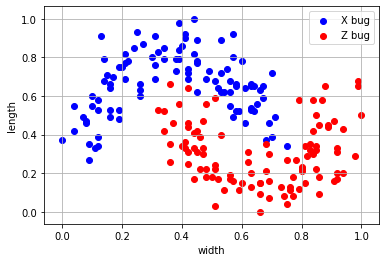

In [197]:
# KEEPOUTPUT
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], color="blue", label="X bug")
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], color="red", label="Z bug")
plt.xlabel("width");plt.ylabel("length"); plt.legend(); plt.grid();

### Use the model created above to generate predictions on this data

by implementing the pipeline in the figure below. You will have to

- Note down the **accuracy**, **precision** and **recall**
- Download the predictions into a file name `test_data_scores.csv`
- Submit your work as in the previous task

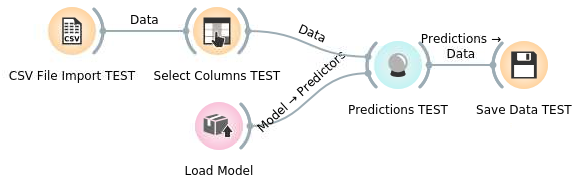

In [198]:
Image("local/imgs/orange_apply_model.png")

**submit your work**

In [199]:
t2_accuracy  = ...
t2_precision = ...
t2_recall    = ...

In [200]:
t2_scores = pd.read_csv("test_data_scores.csv")
print (t2_scores.shape)
t2_scores.head()

**submit your answer**

In [206]:
student.submit_task(globals(), task_id="task_02");


# Task 3. Classification frontier

Finally, we will get a sense of the classification frontier generated by your model. As we are now looking into *how* your model works, we will follow a blind-mode brute-force approach: we will fill the space with posible data points ans look into which ones are classifier where. Note that we can do this as we are in a small setting, but in practice this is **unfeasable** as we probably have more complex data spaces.

### 1. Create a dataset filling up the variables space

The dataset will be stored in `full_space_data.csv`. Observe that **we only have two columns** as the model will tell us the preodictions for each data point.

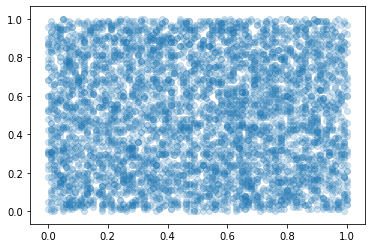

In [71]:
# KEEPOUTPUT
import os
if not os.path.exists('full_space_data.csv'):
    t3_Xf = np.random.random(size=(5000,2)).round(2)
    plt.scatter(t3_Xf[:,0], t3_Xf[:,1], alpha=.5)
    pd.DataFrame(t3_Xf, columns=["width", "length"]).to_csv("full_space_data.csv", index=False)
else:
    t3_Xf = pd.read_csv('full_space_data.csv').values
    t3_Xf = t3_Xf[:5000]
plt.scatter(t3_Xf[:,0], t3_Xf[:,1], alpha=.2)

In [208]:
!head -5 full_space_data.csv

### 2. Upload the dataset to Orange and score your data

- Use the same model trained in Task 01
- Use the same experiment as in Task 02, but change the input dataset to `full_space_data.csv`.
    - observe that you **cannot evaluate performance**. Why is that?
- Download the scored data into a file name `full_space_data_scores.csv`

In [67]:
t3_scoresf = pd.read_csv("full_space_data_scores.csv").iloc[:5000]
t3_scoresf.shape

In [68]:
t3_scoresf.head(5)

### 3. Submit your data

you do not have to fill in anything, simply execute the following cell

**submit your answer**

In [217]:
student.submit_task(globals(), task_id="task_03");

### 4. you are done!!! now observe the classification frontier

- relate the performance you obtained in the previous tasks to the plots obtained
- why is the performance so good in train and different in test?

If you used a decision forest, your frontier will look roughly like the following one, but adjusted to your data


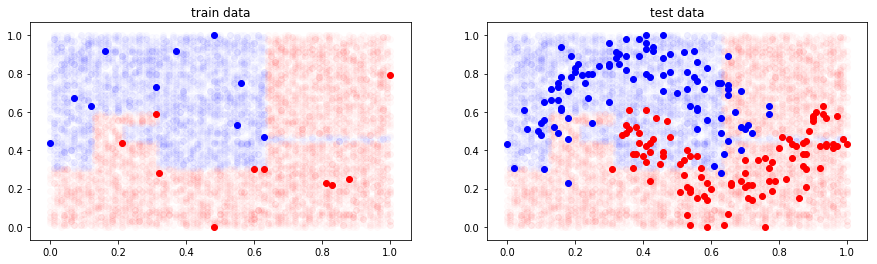

In [218]:
Image("local/imgs/classification_frontier.png")

In [222]:
Xfs = t3_scores[["width", "length"]].values
yfs = t3_scores["Tree"]

In [223]:
_, X, y = load_dataset('train_data.csv')
X.shape, y.shape

In [224]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("train data")
plt.scatter(Xfs[yfs==0][:,0], Xfs[yfs==0][:,1], color="blue", alpha=.02)
plt.scatter(Xfs[yfs==1][:,0], Xfs[yfs==1][:,1], color="red", alpha=.02)
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="blue")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="red")
plt.subplot(122)
plt.title("test data")
plt.scatter(Xfs[yfs==0][:,0], Xfs[yfs==0][:,1], color="blue", alpha=.02)
plt.scatter(Xfs[yfs==1][:,0], Xfs[yfs==1][:,1], color="red", alpha=.02)
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], color="blue")
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], color="red")

